In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from linear_discriminant_analysis import LinearDiscriminatorAnalysis
from linear_discriminant_analysis import LinearDiscriminatorClassifier

## Second Question

In [2]:
X0 = np.array([
    [0,-1],
    [1,0],
    [2,1]
])

X1 = np.array([
    [1,1],
    [-1,1],
    [-1,-1],
    [-1,-1],
])

data = [X0,X1]

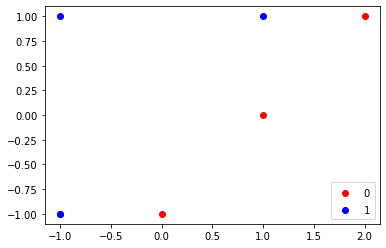

In [3]:
plt.scatter(X0[:,0],X0[:,1],c='r',label='$0$')
plt.scatter(X1[:,0],X1[:,1],c='b',label='$1$')
plt.legend()
#plt.savefig('2nd_data.png')

In [4]:
X = np.vstack(data)
y = np.concatenate([np.zeros((len(X0),)),np.ones((len(X1),))])

In [5]:
lda = LinearDiscriminatorAnalysis(1)
lda.fit(X,y)

1.6530612244897962

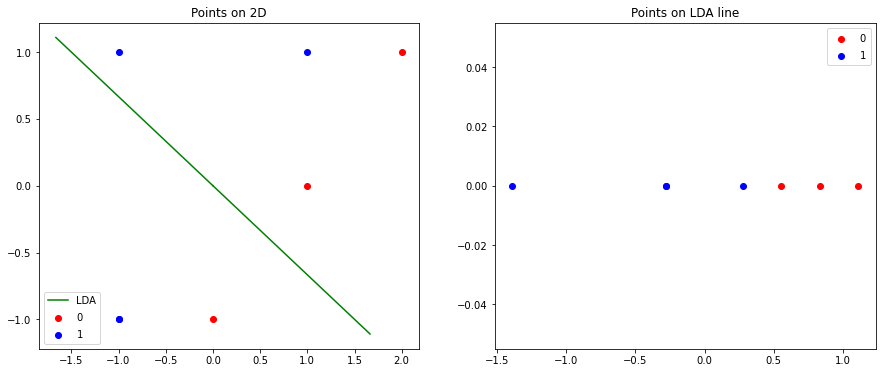

In [6]:
#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Points on 2D')
plt.scatter(X0[:,0],X0[:,1],c='r',label='$0$')
plt.scatter(X1[:,0],X1[:,1],c='b',label='$1$')
plt.plot([0,2*lda._w[0,0]],[0,2*lda._w[1,0]],'g-',label='LDA')
plt.plot([0,-2*lda._w[0,0]],[0,-2*lda._w[1,0]],'g-')
plt.legend()

plt.subplot(1,2,2)
plt.title('Points on LDA line')
plt.scatter(lda.transform(X0),np.zeros(len(X0)),c='r',label='$0$')
plt.scatter(lda.transform(X1),np.zeros(len(X1)),c='b',label='$1$')
plt.legend()
#plt.savefig('2nd_lda.png')

### Third Question

In [7]:
def load_data(filepath):
    dataset = pd.read_csv(filepath)
    X = np.array(dataset.iloc[:,:-1])
    y = np.array(dataset.iloc[:,-1])
    return X,y

In [8]:
X_train,y_train = load_data('./train.csv')
X_test,y_test = load_data('./test.csv')

print(f'X_train.shape: {X_train.shape} -- y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape} -- y_test.shape: {y_test.shape}')

X_train.shape: (4000, 2) -- y_train.shape: (4000,)
X_test.shape: (1000, 2) -- y_test.shape: (1000,)


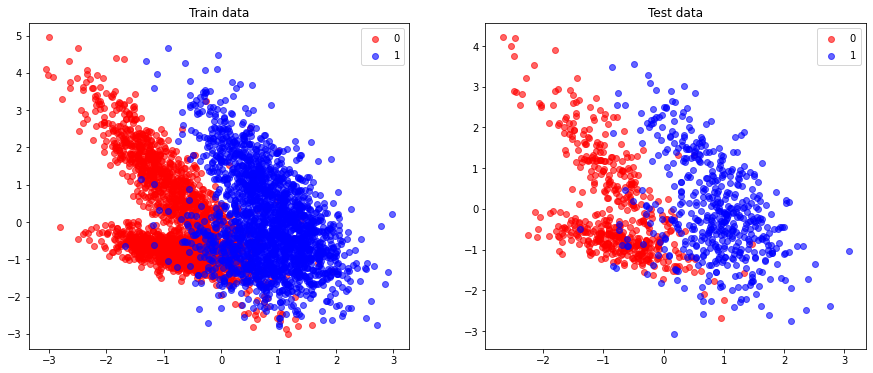

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Train data')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='r',label='$0$',alpha=.6)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='b',label='$1$',alpha=.6)
plt.legend()

plt.subplot(1,2,2)
plt.title('Test data')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c='r',label='$0$',alpha=.6)
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='b',label='$1$',alpha=.6)
plt.legend()

#plt.savefig('data.png')

In [10]:
ldc = LinearDiscriminatorClassifier(n_components=1)
ldc.fit(X_train,y_train)

In [11]:
print(f'LDC w: {ldc._w}')

LDC w: [[0.97077508]
 [0.23999113]]


In [12]:
print(f'LDC Criterion on train set: {ldc.criterion(X_train,y_train)}')
print(f'LDC Criterion on test set: {ldc.criterion(X_test,y_test)}')

LDC Criterion on train set: 1.9893670070475016
LDC Criterion on test set: 2.1812815372067904


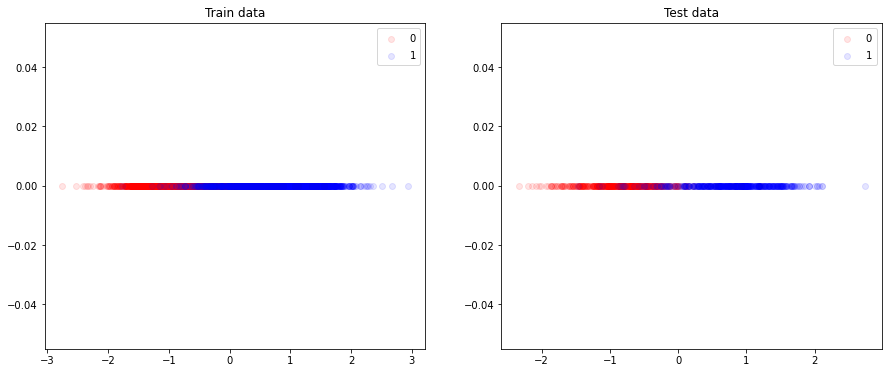

In [13]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Train data')
plt.scatter(ldc.transform(X_train[y_train==0]),np.zeros(np.sum(y_train==0)),c='r',label='$0$',alpha=.1)
plt.scatter(ldc.transform(X_train[y_train==1]),np.zeros(np.sum(y_train==1)),c='b',label='$1$',alpha=.1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Test data')
plt.scatter(ldc.transform(X_test[y_test==0]),np.zeros(np.sum(y_test==0)),c='r',label='$0$',alpha=.1)
plt.scatter(ldc.transform(X_test[y_test==1]),np.zeros(np.sum(y_test==1)),c='b',label='$1$',alpha=.1)
plt.legend()

#plt.savefig('data_on_line.png')

In [14]:
print(f'Accuracy on train set: {ldc.accuracy(X_train,y_train)}')
print(f'Accuracy on test set: {ldc.accuracy(X_test,y_test)}')

Accuracy on train set: 0.922
Accuracy on test set: 0.932


In [15]:
ldc.log_probability(X_train[:1])

array([[-0.9573856 , -4.84835233]])

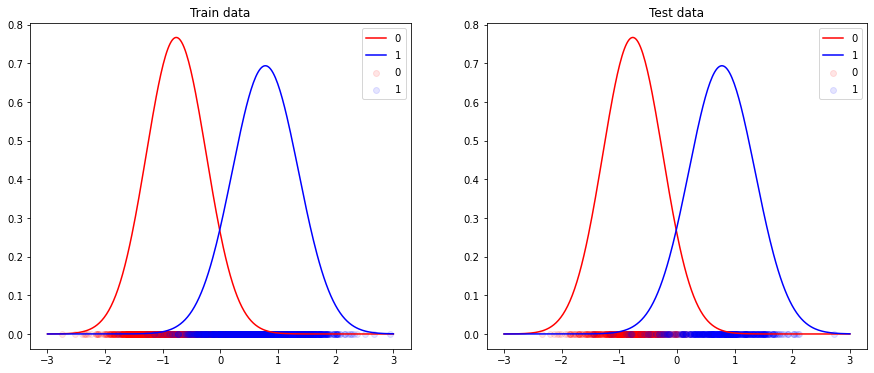

In [16]:
plt.figure(figsize=(15,6))
xs = np.linspace(-3,3,300)

plt.subplot(1,2,1)
plt.title('Train data')
plt.plot(xs,ldc._dists[0].pdf(xs),c='r',label='$0$')
plt.plot(xs,ldc._dists[1].pdf(xs),c='b',label='$1$')
plt.scatter(ldc.transform(X_train[y_train==0]),np.zeros(np.sum(y_train==0)),c='r',label='$0$',alpha=.1)
plt.scatter(ldc.transform(X_train[y_train==1]),np.zeros(np.sum(y_train==1)),c='b',label='$1$',alpha=.1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Test data')
plt.plot(xs,ldc._dists[0].pdf(xs),c='r',label='$0$')
plt.plot(xs,ldc._dists[1].pdf(xs),c='b',label='$1$')
plt.scatter(ldc.transform(X_test[y_test==0]),np.zeros(np.sum(y_test==0)),c='r',label='$0$',alpha=.1)
plt.scatter(ldc.transform(X_test[y_test==1]),np.zeros(np.sum(y_test==1)),c='b',label='$1$',alpha=.1)
plt.legend()

#plt.savefig('dist.png')

## Misclassified

In [17]:
train_pred = ldc.predict(X_train)
test_pred = ldc.predict(X_test)

miss_train_indices = train_pred!=y_train
miss_test_indices = test_pred!=y_test

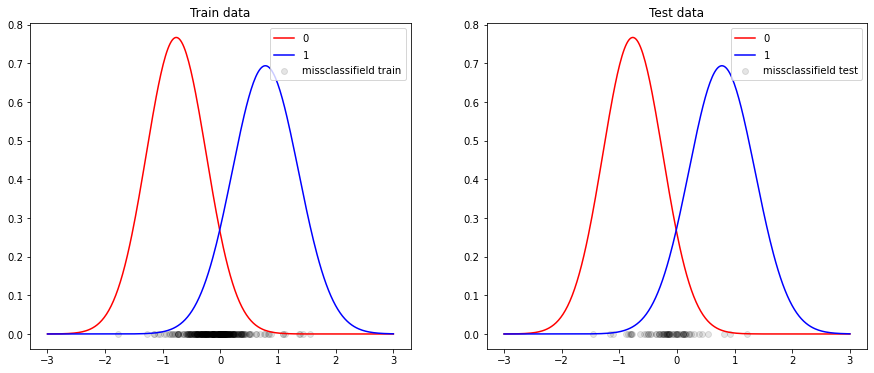

In [18]:
plt.figure(figsize=(15,6))
xs = np.linspace(-3,3,300)

plt.subplot(1,2,1)
plt.title('Train data')
plt.plot(xs,ldc._dists[0].pdf(xs),c='r',label='$0$')
plt.plot(xs,ldc._dists[1].pdf(xs),c='b',label='$1$')
plt.scatter(ldc.transform(X_train[miss_train_indices]),np.zeros(np.sum(miss_train_indices)),c='k',label='missclassifield train',alpha=.1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Test data')
plt.plot(xs,ldc._dists[0].pdf(xs),c='r',label='$0$')
plt.plot(xs,ldc._dists[1].pdf(xs),c='b',label='$1$')
plt.scatter(ldc.transform(X_test[miss_test_indices]),np.zeros(np.sum(miss_test_indices)),c='k',label='missclassifield test',alpha=.1)

plt.legend()

#plt.savefig('miss.png')

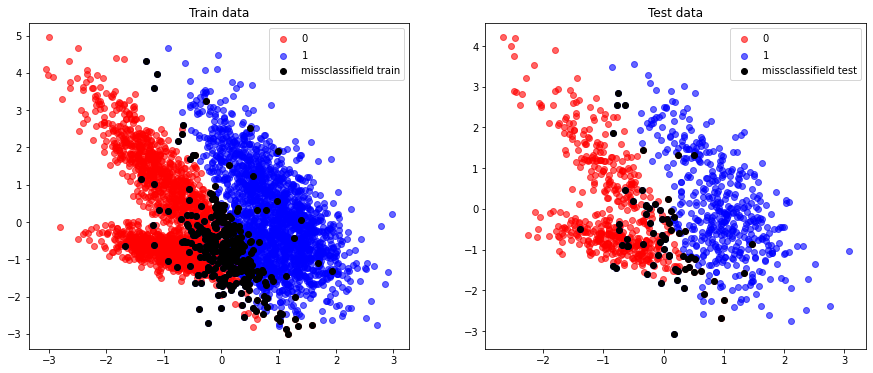

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Train data')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='r',label='$0$',alpha=.6)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='b',label='$1$',alpha=.6)
plt.scatter(X_train[miss_train_indices,0],X_train[miss_train_indices,1],c='k',label='missclassifield train',alpha=1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Test data')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c='r',label='$0$',alpha=.6)
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='b',label='$1$',alpha=.6)
plt.scatter(X_test[miss_test_indices,0],X_test[miss_test_indices,1],c='k',label='missclassifield test',alpha=1)
plt.legend()

#plt.savefig('miss_2.png')